<a href="https://colab.research.google.com/github/sivagami-murugesan/sivagami-murugesan.github.io/blob/BA_Python/BA_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt


base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 3
page_size = 10

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
       reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 10 total reviews
Scraping page 2
   ---> 20 total reviews
Scraping page 3
   ---> 30 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews

df.to_csv("BA_reviews.csv")

In [ ]:
reviews = pd.read_csv("BA_reviews.csv")
#reviews = reviews.pop("reviews")
reviews

,Unnamed: 0,reviews
0,0,✅ Trip Verified | If you can’t fly First Class...
1,1,Not Verified | Singapore to Heathrow. Busine...
2,2,Not Verified | I reported my damaged/ruined ...
3,3,"Not Verified | On March 1st, I flew from Ber..."
4,4,Not Verified | The WORST customer experience! ...
5,5,Not Verified | Had to cancel my flight month...
6,6,✅ Trip Verified | Flight cancelled with no rea...
7,7,✅ Trip Verified | This is a route I fly regula...
8,8,✅ Trip Verified | While BA may have made some...
9,9,✅ Trip Verified | British Airways new Club Sui...


In [ ]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
print(STOPWORDS)

frozenset({'these', 'four', 'however', 'how', 'we', 'two', 'hereafter', 'one', 'get', 'ever', 'alone', 'done', 'do', 'almost', 'himself', 'hereby', 'such', 'my', 'using', 'since', 'used', 'does', 'anywhere', 'few', 'well', 'therefore', 'ltd', 'latterly', 'is', 'amoungst', 'they', 'were', 'from', 'again', 'who', 'find', 'will', 'to', 'here', 'several', 'his', 'both', 'eg', 'next', 'he', 'most', 'otherwise', 'namely', 'further', 'below', 'everywhere', 'eight', 'interest', 'wherein', 'what', 'detail', 'nevertheless', 'last', 'all', 'during', 'those', 'over', 'thus', 'about', 'many', 'whereupon', 'always', 'thence', 'became', 'becomes', 'on', 'no', 'make', 'before', 'them', 'its', 'whose', 'their', 'might', 'afterwards', 'been', 'under', 'never', 'other', 'around', 'twelve', 'thru', 'call', 'our', 'against', 'together', 'between', 'bill', 'another', 'others', 'seemed', 'amount', 'without', 'bottom', 'whether', 'ie', 'noone', 'yourself', 'rather', 'nobody', 'mine', 'except', 'because', 'her

In [ ]:

test = pd.DataFrame(reviews)
test.columns = ["0","reviews"]

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test['reviews_ws'] = test['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))
print(test)


         0                                            reviews  \
0        0  Not Verified |   Singapore to Heathrow. Busine...   
1        1  Not Verified |   I reported my damaged/ruined ...   
2        2  Not Verified |   On March 1st, I flew from Ber...   
3        3  Not Verified | The WORST customer experience! ...   
4        4  Not Verified |   Had to cancel my flight month...   
...    ...                                                ...   
3795  3795  I have just been reviewing all the reviews on ...   
3796  3796  Flew from San Francisco to Heathrow London. Fl...   
3797  3797  I flew Singapore to Sydney with them recently ...   
3798  3798  LGW-VRN-LGW both in Club Europe. Was offered a...   
3799  3799  6 May 2014: Las Vegas to Gatwick. Boeing 777. ...   

                                             reviews_ws  
0     Not Verified | Singapore Heathrow. Business cl...  
1     Not Verified | I reported damaged/ruined suitc...  
2     Not Verified | On March 1st, I flew Ber

In [ ]:
test


,0,reviews
0,0,Not Verified | Singapore to Heathrow. Busine...
1,1,Not Verified | I reported my damaged/ruined ...
2,2,"Not Verified | On March 1st, I flew from Ber..."
3,3,Not Verified | The WORST customer experience! ...
4,4,Not Verified | Had to cancel my flight month...
...,...,...
3795,3795,I have just been reviewing all the reviews on ...
3796,3796,Flew from San Francisco to Heathrow London. Fl...
3797,3797,I flew Singapore to Sydney with them recently ...
3798,3798,LGW-VRN-LGW both in Club Europe. Was offered a...


In [ ]:
#reviews=test.pop('reviews_ws')
reviews

0       Not Verified  Singapore Heathrow Business clas...
1       Not Verified  I reported damagedruined suitcas...
2       Not Verified  On March 1st I flew Berlin São P...
3       Not Verified  The WORST customer experience Br...
4       Not Verified  Had cancel flight months advance...
                              ...                        
3795    I reviewing reviews website evident booked Fir...
3796    Flew San Francisco Heathrow London Flight dela...
3797    I flew Singapore Sydney recently horrible flyi...
3798    LGWVRNLGW Club Europe Was offered upgrade way ...
3799    6 May 2014 Las Vegas Gatwick Boeing 777 Back B...
Name: reviews_ws, Length: 3800, dtype: object

In [ ]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

reviews = reviews.str.replace('Trip Verified |', '')
reviews = reviews.str.replace('✅', '')
reviews = reviews.str.replace('|', '')
reviews = reviews.str.replace(r'\b(\w{1,3})\b', '')
reviews = reviews.apply(remove_punctuations)
reviews

0       Not Verified  Singapore Heathrow Business clas...
1       Not Verified  I reported damagedruined suitcas...
2       Not Verified  On March 1st I flew Berlin São P...
3       Not Verified  The WORST customer experience Br...
4       Not Verified  Had cancel flight months advance...
                              ...                        
3795    I reviewing reviews website evident booked Fir...
3796    Flew San Francisco Heathrow London Flight dela...
3797    I flew Singapore Sydney recently horrible flyi...
3798    LGWVRNLGW Club Europe Was offered upgrade way ...
3799    6 May 2014 Las Vegas Gatwick Boeing 777 Back B...
Name: reviews_ws, Length: 3800, dtype: object

In [ ]:
freq_words = pd.Series(' '.join(reviews).lower().split()).value_counts()[:50]
freq_words

i             11179
flight         6874
the            5001
ba             4728
service        2913
seat           2398
food           2388
london         2220
british        2214
crew           2209
airways        2187
seats          2143
good           2135
time           2125
cabin          2015
class          1962
business       1652
staff          1602
heathrow       1575
economy        1446
we             1296
flights        1220
it             1191
return         1152
club           1124
hours          1098
plane          1078
airline        1073
passengers     1059
verified       1042
lounge         1040
boarding       1025
experience      957
check           920
fly             908
this            905
new             899
meal            880
aircraft        879
review          863
told            816
hour            811
like            775
airlines        765
on              755
customer        741
airport         722
drinks          721
better          720
long            710


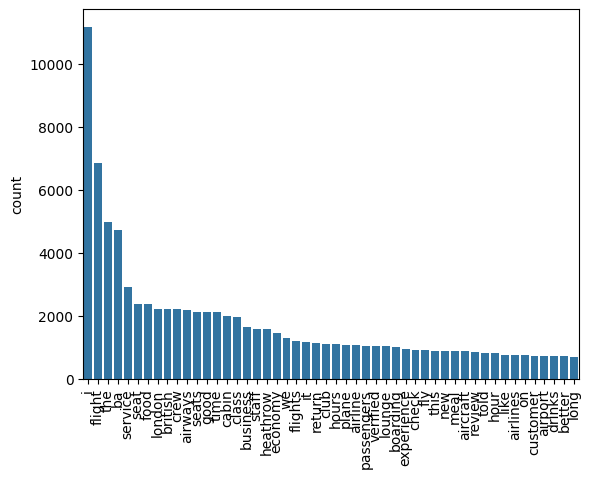

In [ ]:
sns.barplot(data = freq_words)
plt.xticks(rotation=90)
plt.show()